In [1]:


import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/satellite-image-classification/data/cloudy/train_17406.jpg
/kaggle/input/satellite-image-classification/data/desert/desert(14).jpg
/kaggle/input/satellite-image-classification/data/green_area/Forest_2838.jpg
/kaggle/input/satellite-image-classification/data/water/SeaLake_926.jpg


['cloudy', 'desert', 'green_area', 'water']


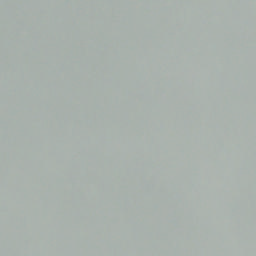

In [2]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, load_img 
print(os.listdir('/kaggle/input/satellite-image-classification/data'))
import cv2
import matplotlib.pyplot as plt
load_img('/kaggle/input/satellite-image-classification/data/cloudy/train_17406.jpg')

In [3]:
print(len(os.listdir('/kaggle/input/satellite-image-classification/data/cloudy')))
print(len(os.listdir('/kaggle/input/satellite-image-classification/data/desert')))
print(len(os.listdir('/kaggle/input/satellite-image-classification/data/green_area')))
print(len(os.listdir('/kaggle/input/satellite-image-classification/data/water')))

1500
1131
1500
1500


<BarContainer object of 4 artists>

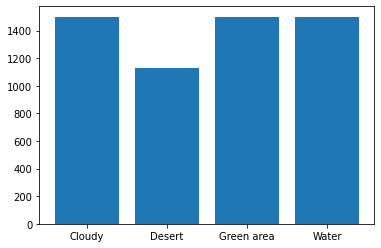

In [4]:
import matplotlib.pyplot as plt
x=['Cloudy','Desert','Green area','Water']
y=[1500,1131,1500,1500]
plt.bar(x,y)

In [5]:
train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)#1. means float values upto 255 pixels 
train_data=train_gen.flow_from_directory('/kaggle/input/satellite-image-classification/data',target_size=(64,64)
                                         ,batch_size=32,class_mode='categorical',shuffle=True,subset='training')

Found 4505 images belonging to 4 classes.


In [6]:
test_data=train_gen.flow_from_directory('/kaggle/input/satellite-image-classification/data',target_size=(64,64),
                                   batch_size=1,shuffle=False,subset='validation')

Found 1126 images belonging to 4 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout
model=Sequential()
model.add(Conv2D(33,(3,3),strides = 2,activation = 'relu',padding = 'valid',input_shape=(64,64,3)))  #32 is the filter,3,3 is the size of the each filter
model.add(Conv2D(45,(3,3),strides = 2,activation = 'relu',padding = 'same'))     ## before  conv we should use batchN since we did 1./255 we can use BN after conv.
# model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Flatten())                              ## 64,64,3 is for colord image           #padding = valid .it reduceses the shape size 
# model.add(Dropout(0.1))
model.add(Dense(84,activation = 'sigmoid')) 
model.add(Dense(60,activation = 'relu'))
model.add(Dense(4,activation = 'softmax'))  
model.summary()
# model.add(Conv2D(20,(4,4),strides=2,activation='relu',padding='valid',input_shape=(64,64,3)))# 32 filter , each with size 3 in filter 
# model.add(MaxPooling2D((2,2),padding='same'))
# model.add(Conv2D(20,(3,3),strides=3,activation='relu',padding='same'))
# model.add(Conv2D(5,(2,2),strides=3,activation='relu',padding='valid'))
# model.add(MaxPooling2D((2,2),padding='same'))
# model.add(BatchNormalization())
# model.add(Flatten())
# model.add(Dense(20,activation='selu'))
# model.add(Dense(30,activation='relu'))
# model.add(Dense(4,activation='softmax'))   #final layer is one node bcox the output is binary . forbinary we put node as 1 and for softmax(categorial) we use based to categorical fatures nodes 
# model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 33)        924       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 45)        13410     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 45)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2880)              0         
_________________________________________________________________
dense (Dense)                (None, 84)                242004    
_________________________________________________________________
dense_1 (Dense)              (None, 60)                5100      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2

2022-04-20 09:17:54.827401: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
model.fit(train_data,validation_data=test_data,epochs=8)

2022-04-20 09:17:55.372603: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/8
141/141 [==============================] - 37s 253ms/step - loss: 0.6356 - accuracy: 0.6739 - val_loss: 0.5198 - val_accuracy: 0.7176
Epoch 2/8
141/141 [==============================] - 16s 111ms/step - loss: 0.4516 - accuracy: 0.7936 - val_loss: 0.4765 - val_accuracy: 0.7824
Epoch 3/8
141/141 [==============================] - 15s 106ms/step - loss: 0.3772 - accuracy: 0.8442 - val_loss: 0.4127 - val_accuracy: 0.8162
Epoch 4/8
141/141 [==============================] - 15s 108ms/step - loss: 0.3395 - accuracy: 0.8537 - val_loss: 0.2975 - val_accuracy: 0.8783
Epoch 5/8
141/141 [==============================] - 15s 105ms/step - loss: 0.3255 - accuracy: 0.8655 - val_loss: 0.2810 - val_accuracy: 0.8872
Epoch 6/8
141/141 [==============================] - 15s 108ms/step - loss: 0.3157 - accuracy: 0.8713 - val_loss: 0.3284 - val_accuracy: 0.8544
Epoch 7/8
141/141 [==============================] - 16s 115ms/step - loss: 0.2814 - accuracy: 0.8852 - val_loss: 0.3094 - val_accuracy:

In [10]:
pred=model.predict(test_data).argmax(axis=1)  #argmax takes the max probaility 
pred

array([0, 0, 0, ..., 3, 2, 3])

In [11]:
train_data.class_indices

{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}

In [12]:
import cv2
import numpy as np

img = cv2.imread('/kaggle/input/satellite-image-classification/data/desert/desert(14).jpg')
img = cv2.resize(img,(64,64))
img = img/255.0
img = img.reshape(-1,64,64,3)

np.round(model.predict(img)).argmax(axis=1)

array([3])

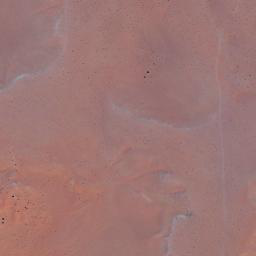

In [13]:
load_img('/kaggle/input/satellite-image-classification/data/desert/desert(14).jpg')